# Análisis EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../Data/Salary_Data.csv')
data['Education Level'] = data['Education Level'].replace('phD', 'PhD')

In [8]:
data['Job Title'] = data['Job Title'].astype(str)

def categorize_job_title(title):
    if title.startswith('Senior'):
        return 'Senior'
    elif title.startswith('Junior'):
        return 'Junior'
    else:
        return 'Regular'

data['Job Category'] = data['Job Title'].apply(categorize_job_title)
data['Job Title'] = data['Job Title'].str.replace('Senior', '').str.replace('Junior', '').str.strip()
print(data[['Job Title', 'Job Category']].head())



           Job Title Job Category
0  Software Engineer      Regular
1       Data Analyst      Regular
2            Manager       Senior
3    Sales Associate      Regular
4           Director      Regular


In [4]:
data.head(6)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0


In [8]:
# Filter out job titles that appear less than 10 times
job_title_counts = data['Job Title'].value_counts()
job_titles_to_keep = job_title_counts[job_title_counts >= 20].index

# Keep only the rows with job titles that appear at least 10 times
data = data[data['Job Title'].isin(job_titles_to_keep)]

row_count = len(data)
print(f'The number of rows in the data is: {row_count}')

The number of rows in the data is: 6363


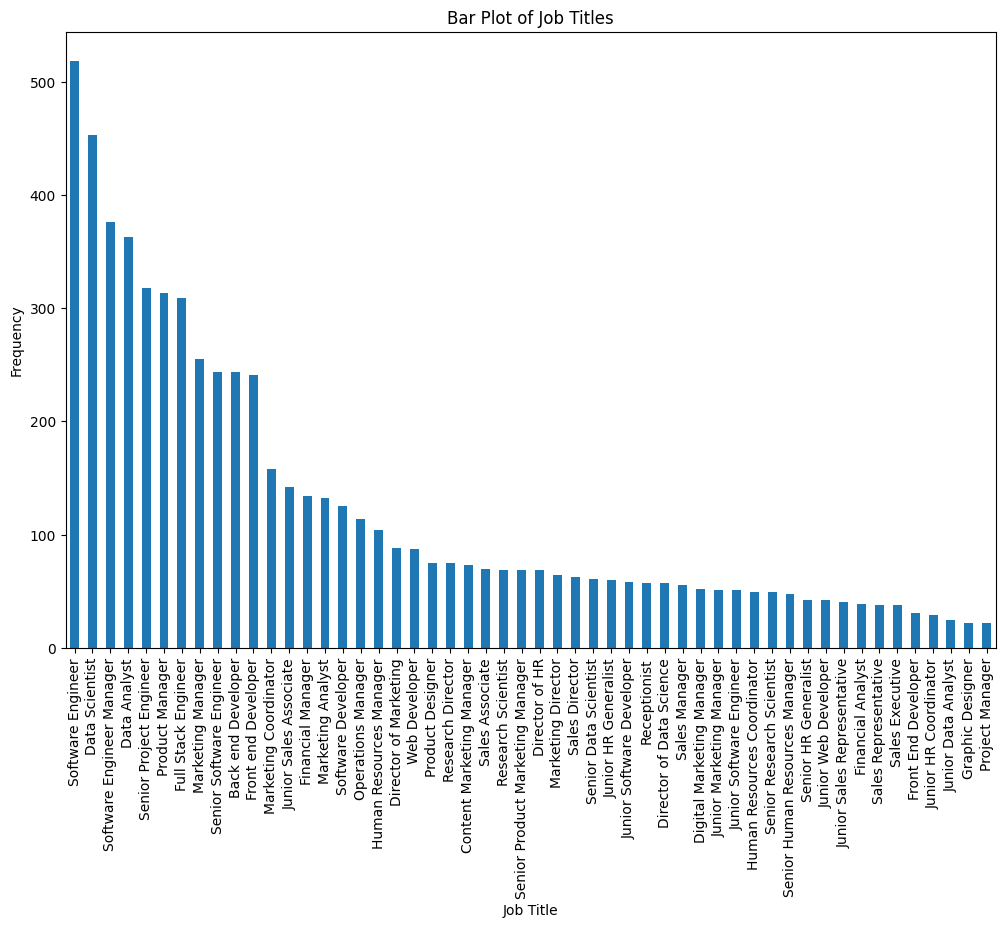

In [10]:
plt.figure(figsize=(12, 8))
data['Job Title'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

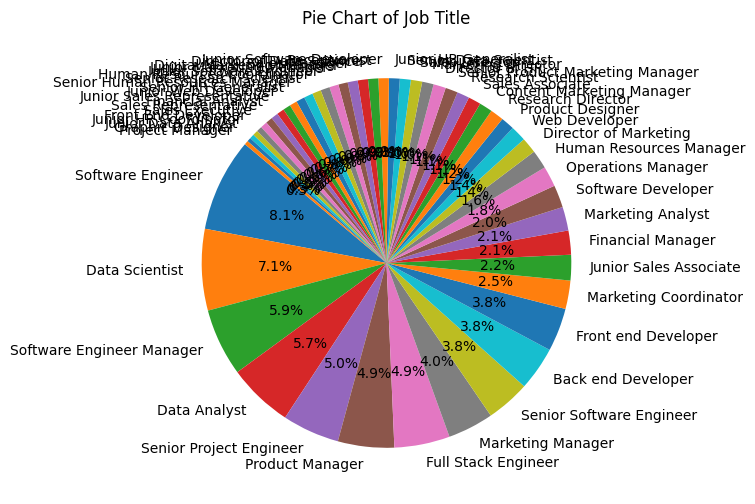

In [11]:
def plot_categorical(column):
    """
    Plots pie charts for the selected categorical column in the dataset.
    """
    
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

plot_categorical("Job Title")

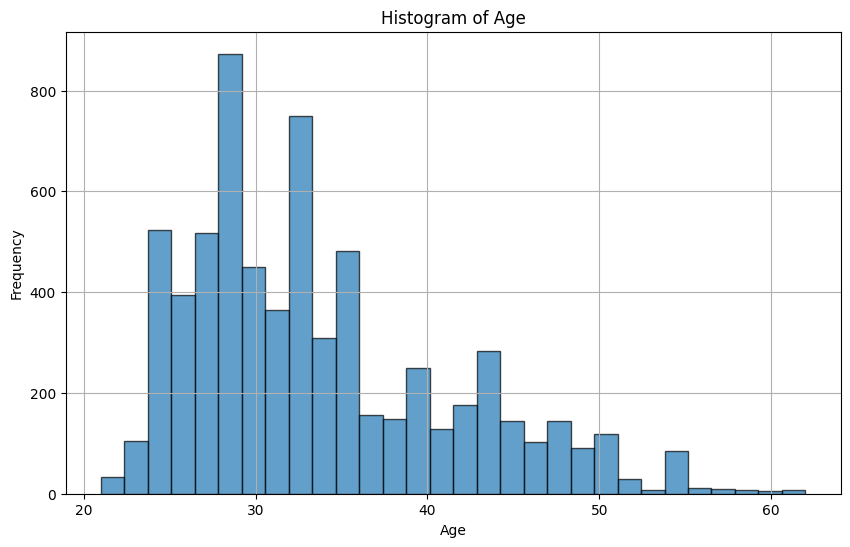

In [13]:
# Example usage
columns_to_plot = ['Age', 'Years of Experience', 'Salary']

plot_histograms('Age')

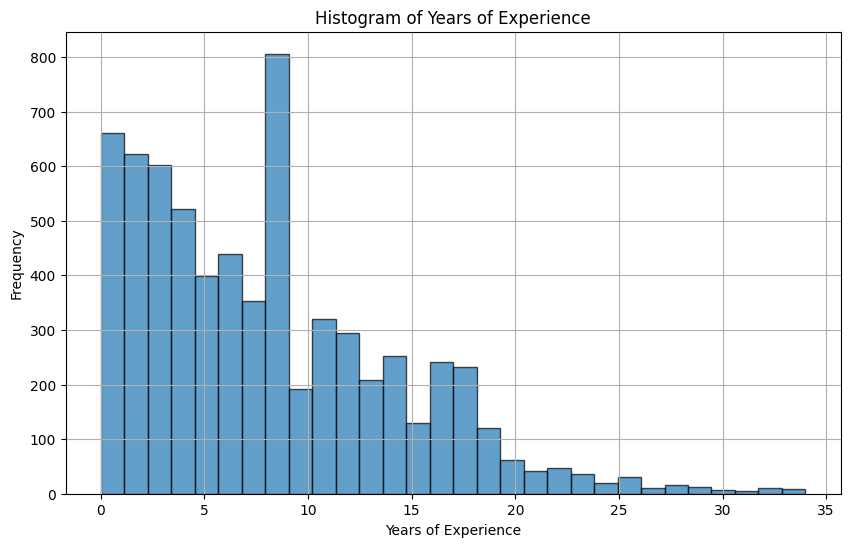

In [14]:
plot_histograms('Years of Experience')

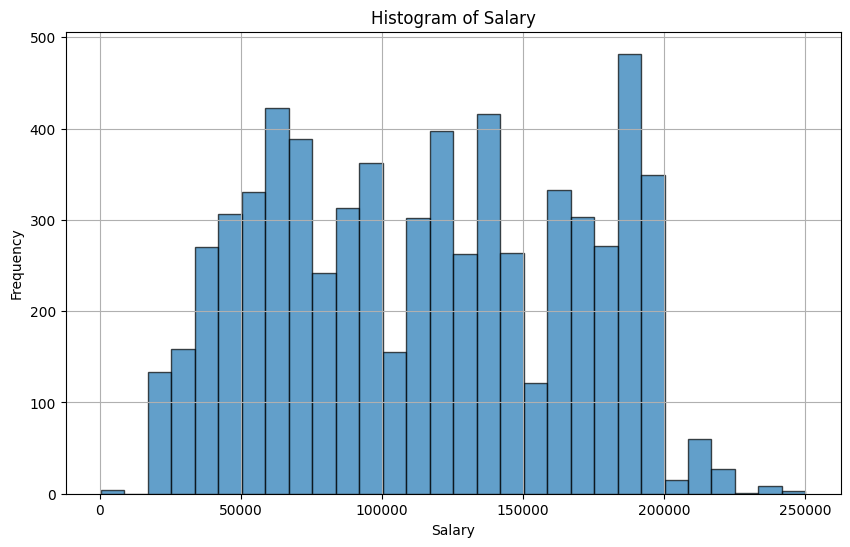

In [15]:
plot_histograms('Salary')

In [4]:
def transform_experience(experience):
    # Split the range and calculate the average
    min_exp, max_exp = experience.split(' to ')
    max_exp = max_exp.replace('Years', '').strip()

    return (int(min_exp) + int(max_exp)) / 2

# Apply the transformation to the "Experience" column
data['Experience'] = data['Experience'].apply(transform_experience)
print(data['Experience'].head())

0    10.0
1     7.0
2     6.0
3     7.5
4     6.5
Name: Experience, dtype: float64


In [13]:
unique_experience_values = data["Gender"].unique()
print(unique_experience_values)

['Male' 'Female' 'Other']


# Análisis de características

Tabla caracteristicas

| #  | Column            | Non-Null Count    | Dtype   |
|----|-------------------|-------------------|---------|
| 0  | Job Id            | 1615940 non-null  | int64   |
| 1  | Experience        | 1615940 non-null  | object  |
| 2  | Qualifications    | 1615940 non-null  | object  |
| 3  | Salary Range      | 1615940 non-null  | object  |
| 4  | location          | 1615940 non-null  | object  |
| 5  | Country           | 1615940 non-null  | object  |
| 6  | latitude          | 1615940 non-null  | float64 |
| 7  | longitude         | 1615940 non-null  | float64 |
| 8  | Work Type         | 1615940 non-null  | object  |
| 9  | Company Size      | 1615940 non-null  | int64   |
| 10 | Job Posting Date  | 1615940 non-null  | object  |
| 11 | Preference        | 1615940 non-null  | object  |
| 12 | Contact Person    | 1615940 non-null  | object  |
| 13 | Contact           | 1615940 non-null  | object  |
| 14 | Job Title         | 1615940 non-null  | object  |
| 15 | Role              | 1615940 non-null  | object  |
| 16 | Job Portal        | 1615940 non-null  | object  |
| 17 | Job Description   | 1615940 non-null  | object  |
| 18 | Benefits          | 1615940 non-null  | object  |
| 19 | skills            | 1615940 non-null  | object  |
| 20 | Responsibilities  | 1615940 non-null  | object  |
| 21 | Company           | 1615940 non-null  | object  |
| 22 | Company Profile   | 1610462 non-null  | object  |

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [14]:
data.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [ ]:
"""
st.subheader('Lets find the distribution between males and females	:man-girl:')
value_count=df['sex'].value_counts()
st.dataframe(value_count)

#create a pie chart plot to represent that 

with st.container():
	value_count=df['sex'].value_counts()
	fig,ax=plt.subplots()
	ax.pie(value_count,autopct='%0.2f%%',labels=['Male','Female'])
	st.pyplot(fig)


#now we draw a bar chart
	st.write(value_count.index)
	fig,ax=plt.subplots()
	ax.bar(value_count.index,value_count)
	st.pyplot(fig)



st.markdown('---')
#now i will represent all of that but in a more beautiful representation using layouts

with st.container():
	value_count=df['sex'].value_counts()
	col1,col2=st.columns(2)
	
	with col1:
		st.subheader('Pie Chart')
		fig,ax=plt.subplots()
		ax.pie(value_count,autopct='%0.2f%%',labels=['Male','Female'])
		st.pyplot(fig)

	with col2:
		st.subheader('Bar Chart')
		fig,ax=plt.subplots()
		ax.bar(value_count.index,value_count)
		st.pyplot(fig)

#Finally i will show the distribution using an expander

	with st.expander('Click here to see the value counts'):
		st.dataframe(value_count)


st.markdown('---')
#now lets add widget to select the features to plot


data_types = df.dtypes
cat_cols=tuple(data_types[data_types=='object'].index)

with st.container():
	feature=st.selectbox('Select the feature to display',
						cat_cols
						)
	value_count=df[feature].value_counts()
	col1,col2=st.columns(2)
	
	with col1:
		st.subheader('Pie Chart')
		fig,ax=plt.subplots()
		ax.pie(value_count,autopct='%0.2f%%',labels=value_count.index)
		st.pyplot(fig)

	with col2:
		st.subheader('Bar Chart')
		fig,ax=plt.subplots()
		ax.bar(value_count.index,value_count)
		st.pyplot(fig)

st.markdown('---')
st.header("Seaborn Visualizations Streamlit	:cool:")

st.subheader('First Lets find the distribution of spent between males and females:moneybag:')

with st.container():
	fig,ax=plt.subplots()
	sns.boxplot(x='sex', y='total_bill', data=df, ax=ax)
	st.pyplot(fig)

#Lets allow the user select the chart that want to use :)


with st.container():
	#box, violin, kdeplot, histogram
	chartselection=('box','violin','kdeplot','histogram')
	chart_selection=st.selectbox('Chart type to use:',chartselection)
	fig,ax=plt.subplots()

	if chart_selection=='box':
		sns.boxplot(x='sex', y='total_bill', data=df, ax=ax)

	elif chart_selection=='violin':
		sns.violinplot(x='sex', y='total_bill', data=df, ax=ax)

	elif chart_selection=='kdeplot':
		sns.violinplot(x=df['total_bill'], hue=df['sex'], ax=ax)

	else:
		sns.histplot(x='total_bill', hue='sex', data=df, ax=ax)

	st.pyplot(fig)



st.markdown('---')
st.header("Pandas Visualizations Streamlit:panda_face:")

st.subheader('First the distribution average of bills across each day by  males and females:calendar:')

features_to_groupby=['day','sex']
feature=['total_bill']
select_cols=feature + features_to_groupby

avg_total_bill=df[select_cols].groupby(features_to_groupby).mean()

#lets  unstack the graph

avg_total_bill=avg_total_bill.unstack()
st.dataframe(avg_total_bill)


#lets create the graph

fig,ax=plt.subplots()
avg_total_bill.plot(kind='bar',ax=ax)


#lets move the legend
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
st.pyplot(fig)


st.subheader("lets play with widgets to customized all:partying_face:")

with st.container():
	#1. we will use a multichart to include all categorical features
	#2. we will use a select box to select the visual to use (bar, area or line)
	#3. we will use a radiobutton to display the graph stack or unstack

	#we will use 3 columns to separate all

	col1,col2,col3=st.columns(3)

	with col1:
		group_cols=st.multiselect("Which features you want to use", cat_cols, cat_cols[0])
		features_to_groupby=group_cols
		n_features=len(features_to_groupby)

	with col2:
		chart_type=st.selectbox("Which chart you want to plot",('bar','area','line'))

	with col3:
		stack_option=st.radio("You want to stack", ('Yes', 'No'))
		if stack_option=='Yes':
			stacked = True
		else:
			stacked = False

#And now lets create the visual part

feature=['total_bill']
select_cols=feature+features_to_groupby
avg_total_bill=df[select_cols].groupby(features_to_groupby).mean()

if n_features>1:
	for i in range(n_features - 1):
		avg_total_bill=avg_total_bill.unstack()


fig,ax=plt.subplots()
avg_total_bill.plot(kind=chart_type, ax=ax, stacked=stacked)
ax.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
st.pyplot(fig)

#finally we put the dataframe inside of one expander
with st.expander('Click here to view the values'):
	st.dataframe(avg_total_bill)


st.markdown('---')
st.header('Finally we will find the relation between total_bill and tip on time')

fig,ax=plt.subplots()
sns.scatterplot(x='total_bill', y='tip', hue='time', ax=ax, data=df)
st.pyplot(fig)


st.write('Lets play with widgets to dinamically change the hue category')

fig,ax=plt.subplots()
hue_type=st.selectbox('Which feature you want to use for hue', cat_cols)
sns.scatterplot(x='total_bill', y='tip', hue=hue_type, ax=ax, data=df)
st.pyplot(fig)




"""

